# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.pathway import Pathway
from utils.reporting import GlobalReport
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel


## Create data for models

See 'data' folder for processing of raw data.

In [2]:
process_new_data = True

if process_new_data:
    data_processor = DataProcess(year_min=2016)
    data_processor.create_ml_data()
    data_processor.calculate_paramters_for_pathway_simulation()

All rows: 283285, ML rows:119897, Fraction: 0.42


## Descriptive statistics

In [3]:
ds = DescriptiveStatistics(year_min=2019)
ds.run()

## Thrombolysis decision model

Accuracy: 0.847
Balanced accuracy: 0.821
ROC AUC: 0.916
Actual thrombolysis: 0.306
Predicted thrombolysis: 0.307


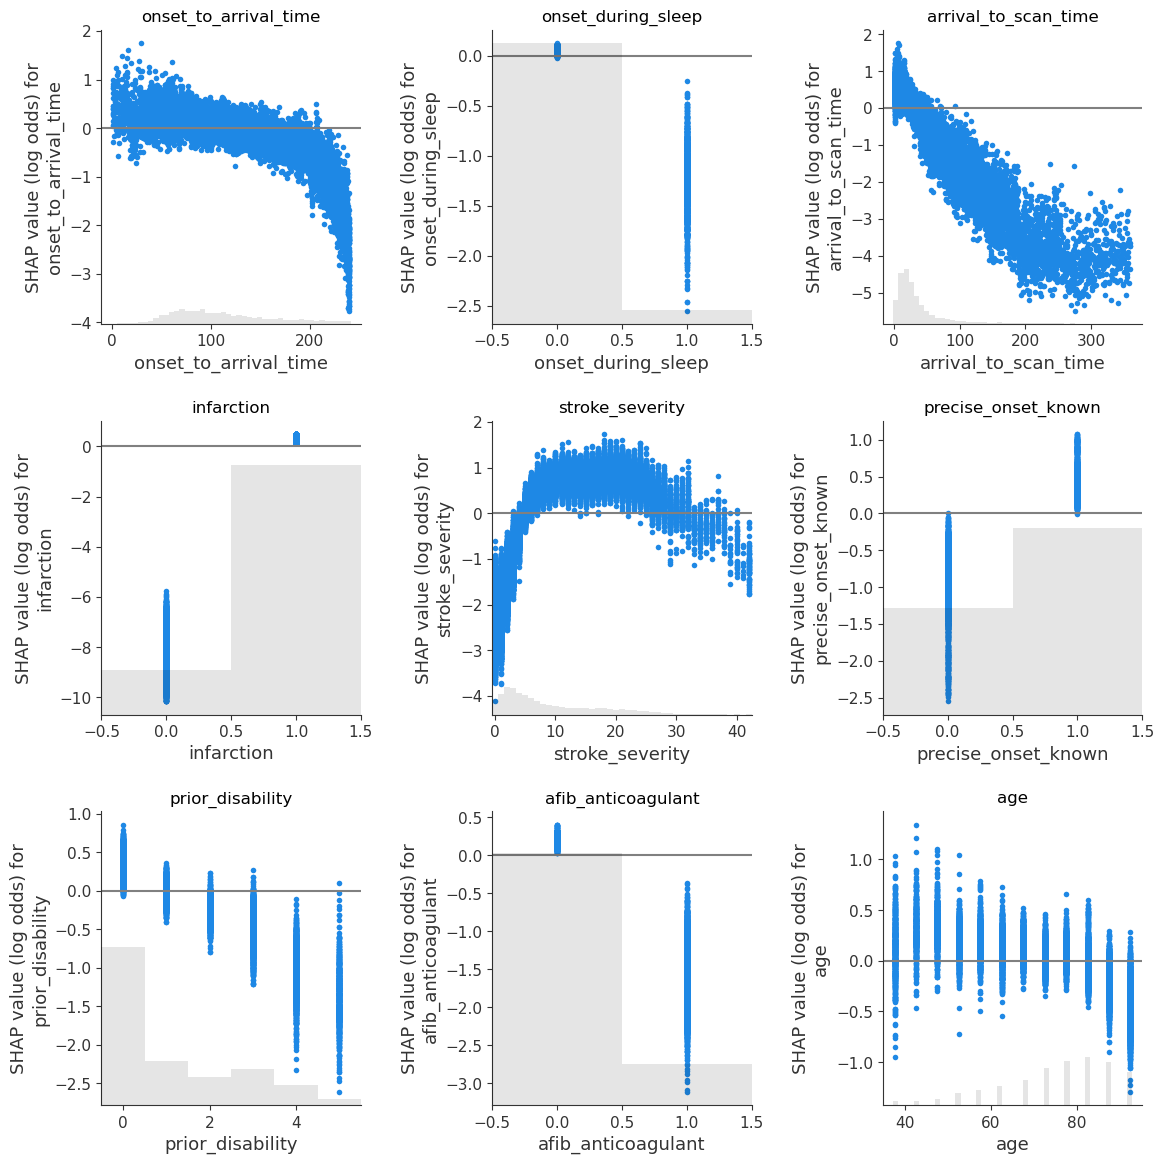

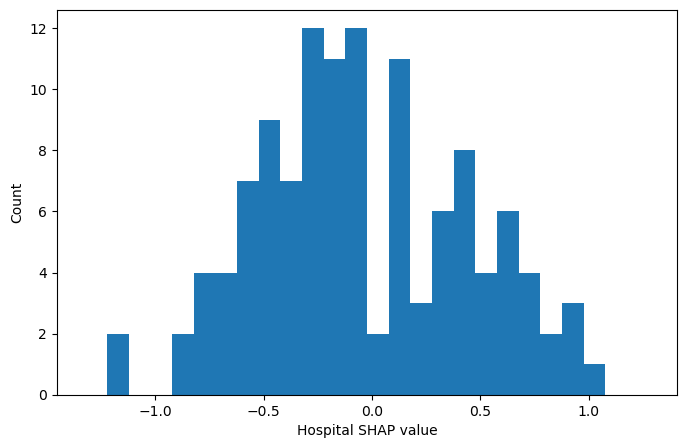

In [4]:
thrombolysis_choice_model = ThrombolysisChoiceModel()
thrombolysis_choice_model.run()

## Pathway model

In [5]:
# Initialize pathway simulation with base case parameters
pathway = Pathway(
    data_processor.pathway_simulation_parameters,
    thrombolysis_choice_model.benchmark_thrombolysis,
    trials=100)
pathway.run()
pathway.sim_results.to_csv('./output/pathway_simulation_results.csv', index=False)   

In [6]:
pathway.sim_results.groupby('scenario').mean().T

scenario,base,benchmark,onset,onset_benchmark,speed,speed_benchmark,speed_onset,speed_onset_benchmark
Baseline_good_outcomes_(median),253.086612,253.272562,253.115041,253.223554,253.170331,253.619917,253.680413,253.880744
Baseline_good_outcomes_per_1000_patients_(low_5%),214.969504,215.157521,214.612562,215.772562,215.976694,215.569587,215.930248,214.824545
Baseline_good_outcomes_per_1000_patients_(high_95%),298.148264,297.175289,301.887438,299.186446,302.551570,303.026116,301.993636,299.640661
Baseline_good_outcomes_per_1000_patients_(mean),255.276033,255.933636,256.369917,256.076529,255.977686,256.660992,256.403719,256.451983
Baseline_good_outcomes_per_1000_patients_(stdev),27.044876,26.942231,27.428678,27.429339,27.087355,27.576116,27.322727,27.150000
Baseline_good_outcomes_per_1000_patients_(95ci),5.300744,5.280579,5.376033,5.375950,5.308926,5.404959,5.354959,5.321405
Percent_Thrombolysis_(median%),13.052231,14.609504,15.231405,16.976529,13.688678,15.179091,16.103554,17.689256
Percent_Thrombolysis_(low_5%),10.140413,11.181653,11.931074,13.187355,10.742397,11.738678,12.590909,14.075041
Percent_Thrombolysis_(high_95%),17.030992,18.280579,19.254793,20.913388,17.192645,19.114050,20.003636,21.781322
Percent_Thrombolysis_(mean),13.308182,14.613719,15.323058,16.952314,13.881074,15.221074,16.048347,17.700165


## Reporting

In [7]:
report = GlobalReport()
report.create_report()